# Доверительные интервалы для доли 

## Генерация данных

In [13]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000)

random_sample = np.random.choice(statistical_population, size = 1000)

In [ ]:
#истинное значение доли
statistical_population.mean()

## Точечная оценка доли

In [6]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [7]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [24]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [25]:
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [8]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [9]:
print ('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [8]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [9]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [10]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [11]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [12]:
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [29]:
max(n_samples)


9604

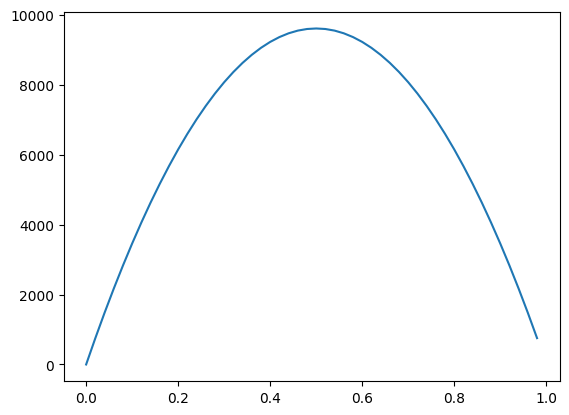

In [28]:
P = np.arange(0, 1, 0.02)
n_samples = [int(np.ceil(samplesize_confint_proportion(p, 0.01))) for p in P]
from matplotlib import pyplot as plt
plt.plot(P, n_samples)
plt.show()